# Lab 4 - Visualization with Geographic Data

In [50]:
#Install the necessary packages
!pip install geopandas
!pip install --upgrade geopandas
!pip install --upgrade fiona

In [51]:
import matplotlib.pyplot as plt
import geopandas

#Read the file
states = geopandas.read_file('cb_2020_us_cousub_500k.zip')

In [52]:
states.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,29,195,22096,00767361,0600000US2919522096,2919522096,Elmwood,Elmwood township,MO,Saline County,Missouri,44,181233131,377337,"POLYGON ((-93.48978 39.06658, -93.48938 39.073..."
1,38,099,45260,01036531,0600000US3809945260,3809945260,Latona,Latona township,ND,Walsh County,North Dakota,44,90848624,2941846,"POLYGON ((-98.16255 48.36954, -98.05746 48.369..."
2,38,017,16100,01036391,0600000US3801716100,3801716100,Cornell,Cornell township,ND,Cass County,North Dakota,44,93440087,0,"POLYGON ((-97.70538 47.04981, -97.70558 47.051..."
3,38,093,22940,01036472,0600000US3809322940,3809322940,Eldridge,Eldridge township,ND,Stutsman County,North Dakota,44,90001176,2572532,"POLYGON ((-98.94567 46.97918, -98.85914 46.979..."
4,38,079,67780,01036243,0600000US3807967780,3807967780,Rolette,Rolette city,ND,Rolette County,North Dakota,25,2609731,0,"POLYGON ((-99.85266 48.6682, -99.83068 48.6681..."


In [53]:
states.crs #Cordinate Reference System
states = states.to_crs("EPSG:3395") #Geospatial refrence system identifier

#Plot only the 48 states
#States and territories to exclude 
exclude = exclude_names = ['Alaska', 'Hawaii', 'Puerto Rico', 'Guam', 'American Samoa', 'Virgin Islands','United States Virgin Islands', 
                           'Northern Mariana Islands', 'Commonwealth of the Northern Mariana Islands', 'District of Columbia']

#Dataset with only the 48 states
states_48 = states[~states['STATE_NAME'].isin(exclude)]
states_48 = states_48.to_crs("EPSG:5070") #Geospatial refrence system identifier

## Visualize the Map of the United States

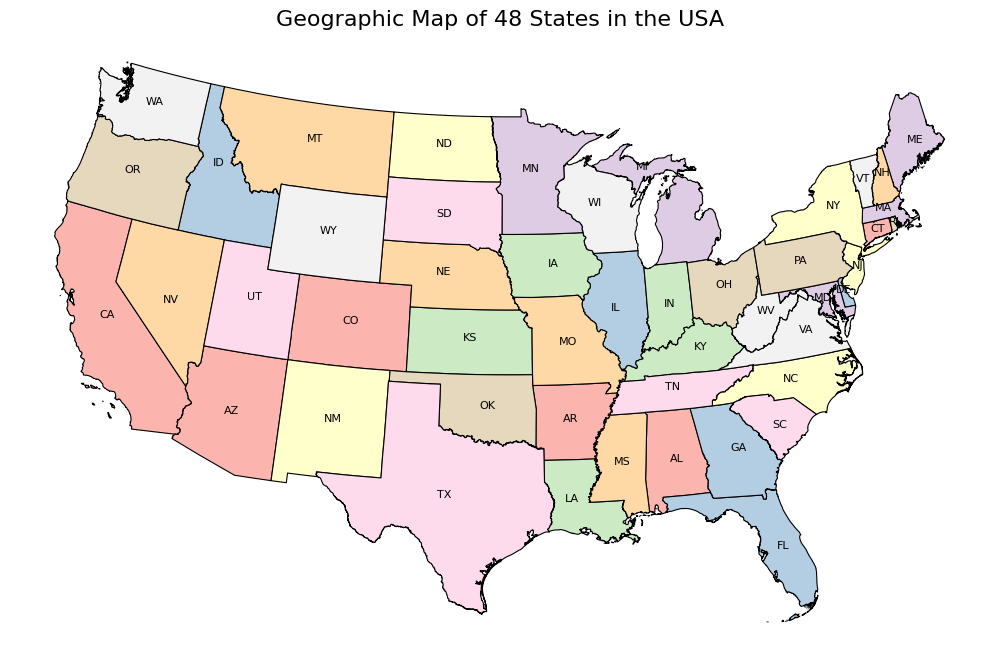

In [54]:
import matplotlib.cm as cm
import numpy as np
#Create new dataset that merges all the data into a single row by a state name
states_merged = states_48.dissolve(by='STATE_NAME', as_index=False)

#Create the plot
fig, ax = plt.subplots(figsize=(13, 8))

#Plot the Map
states_merged.plot(ax=ax, cmap='Pastel1', edgecolor='black', linewidth=0.8, legend=False)


#Add labels with STUSPS to have the Abreviation
for i, row in states_merged.iterrows():
    point = row.geometry.representative_point()  # Better label placement than centroid
    label = f"{row['STUSPS']}"
    ax.text(point.x, point.y, label, fontsize=8, ha='center', color='black')

##Fix the way the plot looks
plt.title("Geographic Map of 48 States in the USA", fontsize=16)
plt.axis('off') #Take off the axis
plt.savefig('VicenteGarcia_GeographicMapof48StatesintheUSASpatialPlot.png')
plt.show()


## Visualize the Distribution of Geographic Data

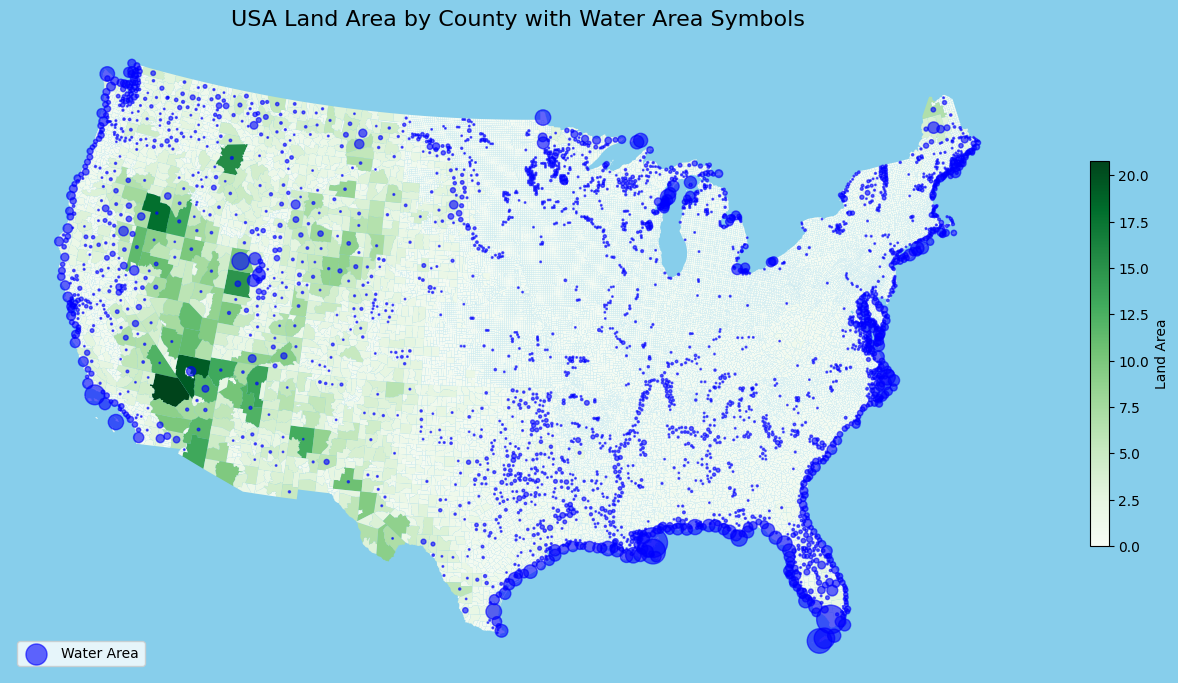

In [55]:
import matplotlib.pyplot as plt

#Create a new dataset that changes the water and land area.
#With the the values made smaller to make them easier to read.
states_area = states_49.copy()
states_area['land_size'] = states_area['ALAND'] / 1e9  
states_area['water_size'] = states_area['AWATER'] / 1e9 

#Only include counties with siginficant water area
water_area = states_area[states_area['water_size'] > 0.01].copy()

#Make the centriods for placeing the water symbols
water_area['centroid'] = water_area.geometry.centroid

#Create the plot
fig, ax = plt.subplots(figsize=(13, 8))

#Change the background color so the green is easir to see
fig.patch.set_facecolor('#87CEEB')

#Plot land area
states_area.plot(ax=ax, column='land_size', cmap='Greens', edgecolor='none', legend=True,
    legend_kwds={ #Change the way the Color bar is Displayed
        'label': "Land Area",
        'orientation': 'vertical',
        'shrink': 0.5,
        'aspect': 20
    })

#Plot water area as circles based on the water size
water_area.set_geometry('centroid').plot(ax=ax, markersize=water_area['water_size'] * 100, color='blue', alpha=0.6, label='Water Area')

#Fix the way the plot looks
plt.title("USA Land Area by County with Water Area Symbols", fontsize=16, color='black')
plt.axis('off') #Take off the axis
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('VicenteGarcia_USALandAreabyCountywithWaterAreaSymbolsCloroplethSymbolMap.png')
plt.show()


## Pie Chart: Distribution of Land Area and Water Area in The USA

This data visualization is designed to show the way that the landmass and area mass are distributed between one another in the USA. This data visualization is done to give a brief introduction to the data and highlight the proportion of each to better understand how much of these resources there are in the USA.

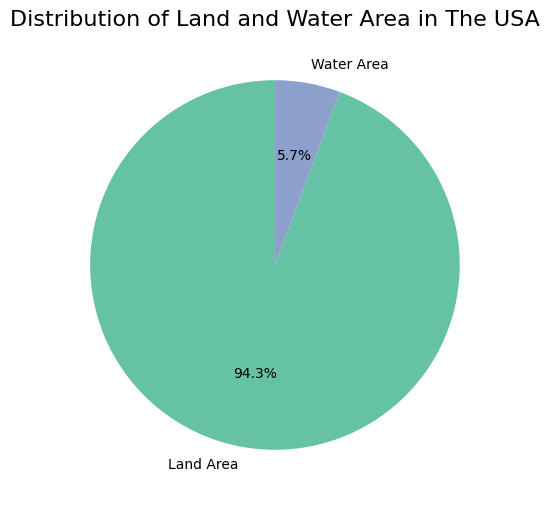

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

#Sum up the total land area and water area
total_land = states['ALAND'].sum()
total_water = states['AWATER'].sum()

#Data for pie chart
sizes = [total_land, total_water]
#Create the water area and land area labels
labels = ['Land Area', 'Water Area']
#Give them thier own represenatitive colors
colors = ['#66c2a5', '#8da0cb']

# Create the plot
plt.figure(figsize=(6, 6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

#Fix the way the plot looks
plt.title('Distribution of Land and Water Area in The USA', fontsize=16)
plt.savefig('VicenteGarcia_DistributionofLandandWaterAreainTheUSAPieChart.png')
plt.show()

### Observations
**Expressiveness**:
This pie chart plot is designed to be simple to show the contrast between the two resources, the land area and the water area, being compared. The colors chosen were used in a way that made sense with each variable. There's also the percentage label given to make it simple for the user to analyze the distribution of the data.

**Effectiveness**:
The sections of the pie chart are labeled and titled effectively to make it easy for the user to understand what items are being compared. There are also percentage labels provided in the pie chart for the user to see the actual distribution. This pie chart is designed to so convey the drastic difference between the amount of land the US is made out of; therefore, it does seem pretty effective in showing this contrast.

**Big takeaway**:
Looking at the pie chart, it is pretty obvious to see how heavily the USA is made up of land, amounting to 94.3%, which does seem to make sense since most of the territories being looked into for the census are on land. The amount of water area the USA is made out of is a surprise because it does seem to be a shockingly low less than ten percent of the data at 5.7%, which seems to be a resource that needs attention drawn to due to just how much more land there is compared to water and the amount of water that the USA depletes.

## Bar Chart: The Top Ten States with The Most Land Area and Thier water area is also included

This data visualization is used to show how big the landmass of each country is to highlight the amount of area these countries have and the way these also relate to the amount of water that is in each. The top ten states in landmass are used because these help understand the way the land in the USA was separated and maybe highlight if there is some sort of geographical reason for this when looking at the map graphs.

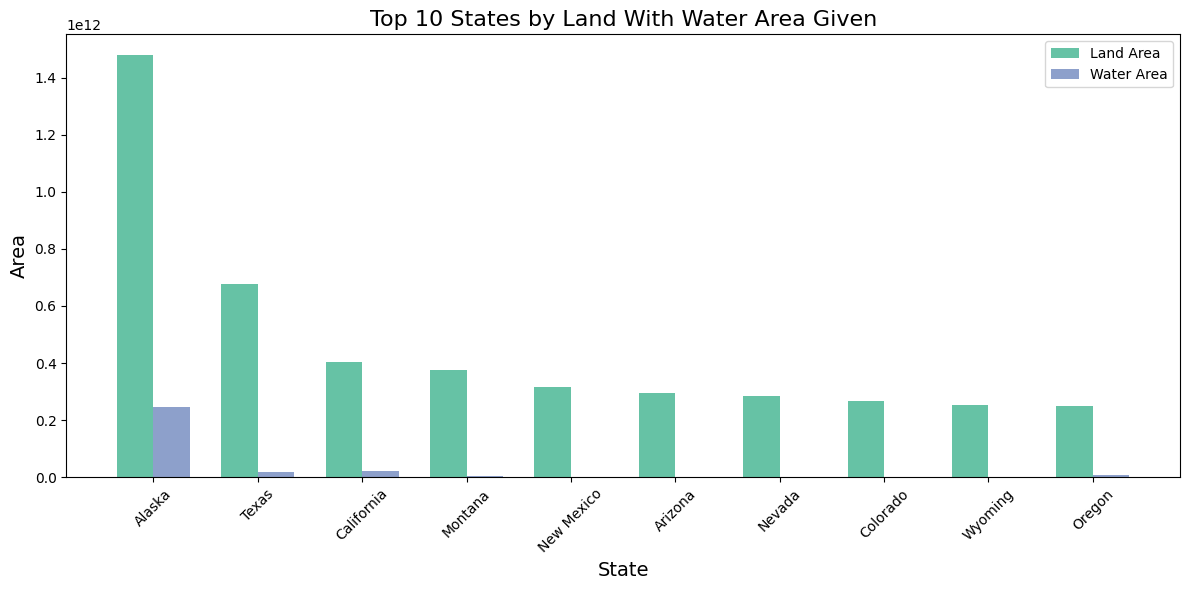

In [57]:
#Group by state and sum land and water area for each state
state_area = states.groupby('STATE_NAME')[['ALAND', 'AWATER']].sum()

#Get top 10 states by land area
top10_states = state_area.sort_values('ALAND', ascending=False).head(10)

#Create a list of the top ten states to use for labels
states_list = top10_states.index.tolist()
#Create arrays of land and water for each state
land = top10_states['ALAND'].values
water = top10_states['AWATER'].values

#Create an array for the x axis 
x = np.arange(len(states_list))
width = 0.35

#Create the plot
plt.figure(figsize=(12, 6))
#Plot the land area bars
plt.bar(x - width/2, land, width, label='Land Area', color='#66c2a5')
#Plot the water area bars
plt.bar(x + width/2, water, width, label='Water Area', color='#8da0cb')

#Fix the way the plot looks
plt.title('Top 10 States by Land With Water Area Given', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Area', fontsize=14)
#Label the x axis with ther states
plt.xticks(ticks=x, labels=states_list, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('VicenteGarcia_Top10StatesbyLandWithWaterAreaGivenBarPlot.png')
plt.show()

### Observations
**Expressiveness**:
This plot is expressive in the US. The bar chart shows the top ten states in terms of land and the amount of water area they have to see the correlation they might have with one another. There is also the same color palette as the last graph used to keep the consistency the same and tell them apart. This design makes it easy to see how the land area is distributed between the top ten states in terms of land area and see any patterns.

**Effectiveness**:
There are clear axis labels used showing the top ten states in the x-axis to the land area in square meters. This visualization is made to be simple and easy to understand with the use of a legend to highlight the distinction between what is the land area and the water area. There is also the same color stay used so the user is not confused. This plot effectively conveys the way the top USA states are split in terms of land and the water area that they have, letting the user understand more about the geographical makeup of each state.

**Big takeaway**:
When looking at the bar chart, it seems that Alaska is the state with the most land area, which makes sense due to how large it is on the USA map, and the amount of water seems to make sense due to it being made up of ice, therefore making it a large supply of water. It is also interesting to see how many states seem to all match each other in size, with New Mexico, Arizona, Nevada, Colorado, Wyoming, and Oregon all having about 0.3 x $10^{12}$ in land area, which does not seem to be the case when looking at them on a map. It is also interesting to note that most of the countries that are shown to have water in the top ten are all countries that border the USA, which is probably due to the ocean being a big resource of water.

## RegPlot: The amount of Land Area and Water Area by State

This data visualization is to see if there is any correlation between the amount of land area in a state and the amount of water area in that country. This will also help to better see the way that land and water interact with one another and if more land area leads to more water sources.

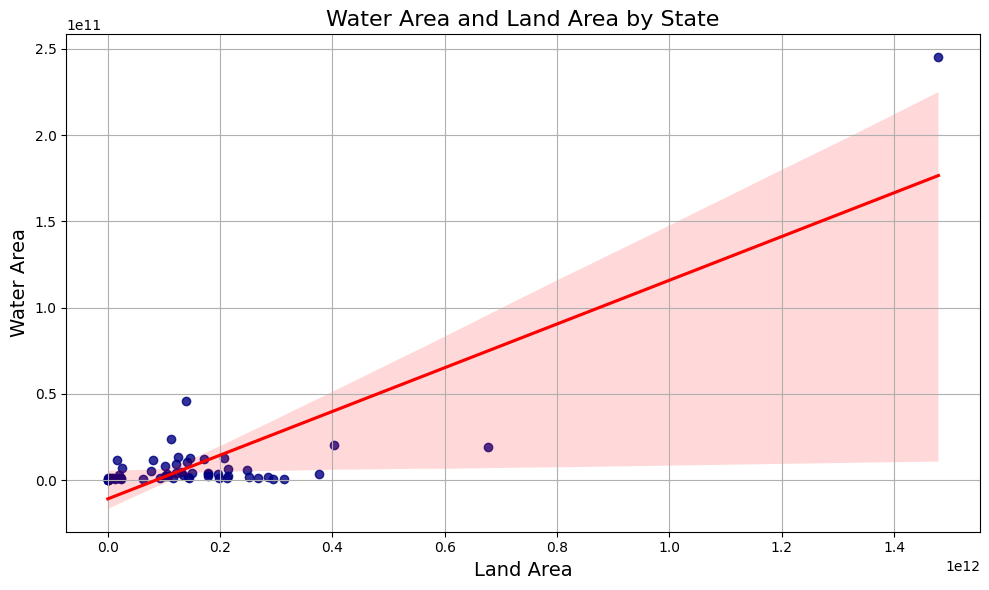

In [58]:
import seaborn as sns

#Group by state and sum land and water area and reset the index to be numebers
state_area = states.groupby('STATE_NAME')[['ALAND', 'AWATER']].sum().reset_index()

#Create the plot
plt.figure(figsize=(10, 6))

#Plot using seaborn regplot
sns.regplot(data=state_area, x='ALAND', y='AWATER', scatter_kws={'color': 'navy'}, line_kws={'color': 'red'})

#Fix the way the plot looks
plt.title('Water Area and Land Area by State', fontsize=16)
plt.xlabel('Land Area', fontsize=14)
plt.ylabel('Water Area', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('VicenteGarcia_WaterAreaandLandAreabyStateRegPlot.png')
plt.show()

### Observations
**Expressiveness**:
This plot uses the variables of land area and water area to see how the two variables might be correlated with one another. There is also a distinct color chosen to cue in the user that both of these two variables are being compared. This design makes it easy for users to spot clusters or any pattern that could hint at a relation or correlation.

**Effectiveness**:
The graph uses clear axis labels and a title to inform the user as to what is being compared. This graph also uses a regplot to inform the user of the flow of that data to let them see the pattern that could be forming. There is also a difference in color for the scatter markers to tell the user that the states by land are being observed. A limitation that this graph has is the regression line could confuse the user into thinking that might be the pattern in the data, which could lead to them thinking a correlation is taking place, which might not be the case.

**Big takeaway**:
When looking at this plot in the data, it is interesting to note how this gives you a general overview of how every individual American state's land and water area is made up. As it is seen in the graph, it seems that most states have very little land area, with most being around 0.0-0.2 x $10^{12}$, and most not having much water area shows that most individual states in America are pretty small and evenly distributed. It is interesting to note the big outlier in the data that seems to have the most land and water, which is probably Alaska, because the data of the previous bar chart we have seen lets us know that it might be a unique state in the USA in terms of its land due to it having the most land and water area.

## Line Plot: The Amount of Counties in Per State and its Land Area 

This data visualization is designed to show the way that the amount of counties and land area might have a relationship with one another. Also, this visualization could help explore the way that county divisions are done in the USA to help understand some of the logic behind these divisions and give a little more insight from the previous graph.

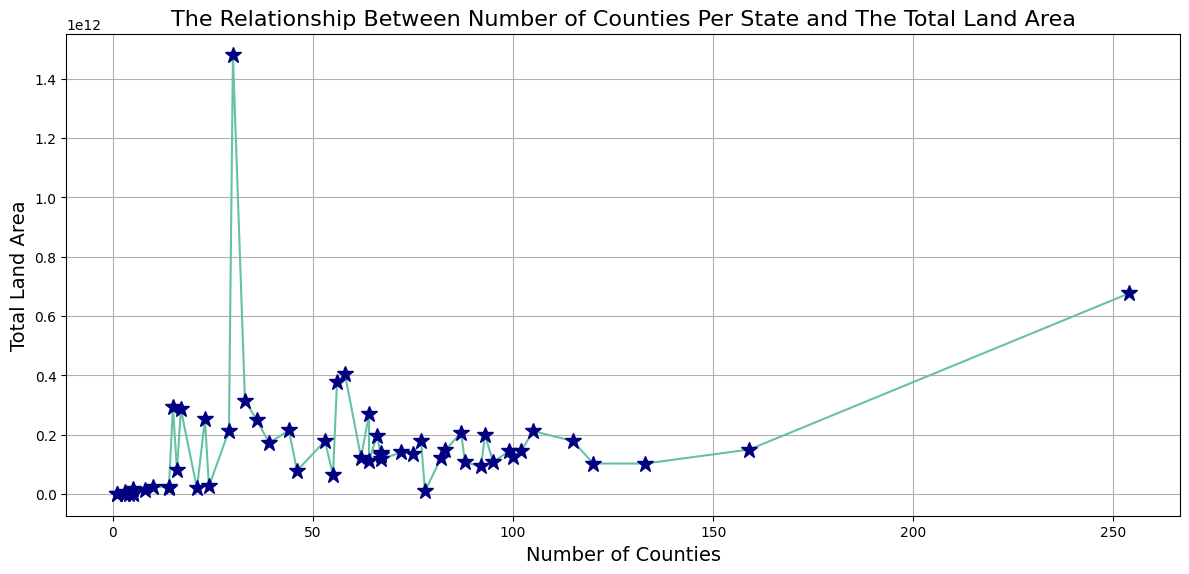

In [59]:
#Get the amount of counties per state
county_count = states.groupby('STATE_NAME')['COUNTYFP'].nunique()

#get the amount of land area per state
state_landarea = states.groupby('STATE_NAME')['ALAND'].sum()

#Create one data rame of the amount of counties and the total land area
counties_lAreas = pd.DataFrame({'Num_Counties': county_count, 'Total_Land_Area': state_landarea})

#Sort by number of counties
counties_lAreas = counties_lAreas.sort_values(by='Num_Counties')

#Create the plot
plt.figure(figsize=(12, 6))

#Plot as line graph
plt.plot(counties_lAreas['Num_Counties'], counties_lAreas['Total_Land_Area'], marker='*', markersize=12,
         markerfacecolor='navy', markeredgecolor='navy', linestyle='-', color='#66c2a5')

#Fix how the plot looks
plt.title('The Relationship Between Number of Counties Per State and The Total Land Area', fontsize=16)
plt.xlabel('Number of Counties', fontsize=14)
plt.ylabel('Total Land Area', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('VicenteGarcia_TheRelationshipBetweenNumberofCountiesPerStateandTheTotalLandAreaLinePlot.png')
plt.show()

### Observations
**Expressiveness**:
This plot was designed to be a little more expressive, making use of the star marker to highlight that each state is being compared, and a line graph is used to show the way the data is flowing. The use of color is kept simple so as not to distract the user due to the star pattern that is used. This graph is designed to show if there is a linear relationship between these two variables.

**Effectiveness**:
There are clear axis and title labels given for each graph to help the user understand the variables that are being compared. There is a use of basic color choices to make the graph not too busy to look at. The use of a line graph for showing this kind of relationship does not seem to be the most appropriate to show this kind of relation due to there being no pattern being communicated.

**Big takeaway**:
By looking at this plot, there is no real pattern that can be seen in this data, highlighting that there seems to be no real relationship between the number of counties a state has and the amount of land area they have. There seems to be a big outlier in the data, which seems to be Alaska, due to it being the only state with that much land area, which is probably due to its population not being as high in many areas that could have several other factors contributing to this. Another point of intrest is that there seems to be a very vague correlation between the number of counties a state has and its land area because after 50 counties, it can be seen that there seems to be a steady increase in the area, but it's not strong enough to say that there is a correlation or relationship.

## Bar Chart: The Top Ten States With The Most Counties.

This visualization is designed to show the top states with the most counties to help show the way that states seem to be populated. It will also help in understanding the way these states may be populated and analyzing further what could possibly make them the states with the most counties.

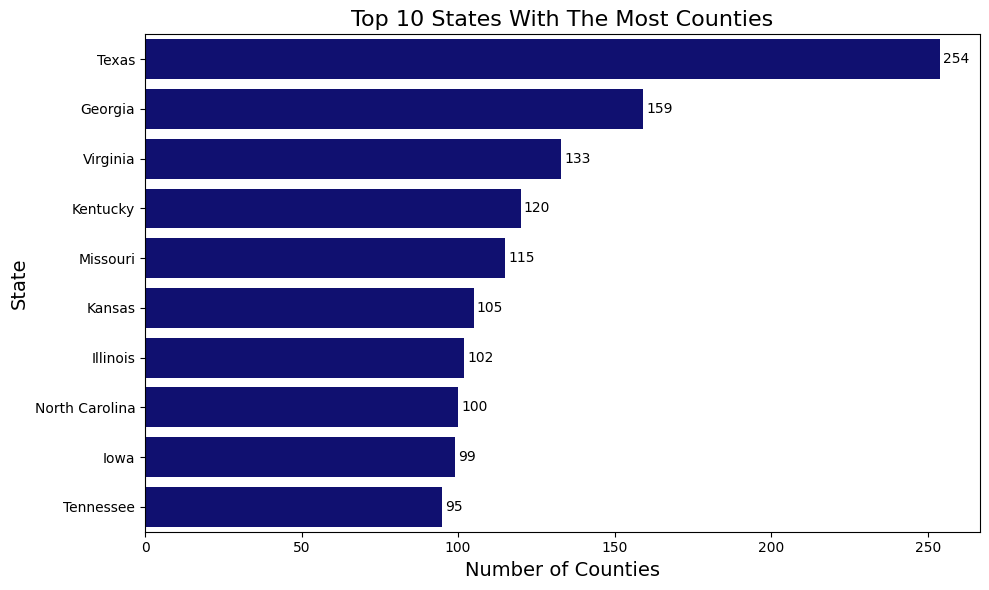

In [60]:
#Group the sates by the amount of counties and get the top ten
county_count = states.groupby('STATE_NAME')['COUNTYFP'].nunique().sort_values(ascending=False).head(10)

#Create the plot
plt.figure(figsize=(10, 6))

#create a bar plot but change the orientation of the bars
sns.barplot(x=county_count.values, y=county_count.index, #Labels with the county
             color='navy')

#Add number labels to the end of each bar
for i, (value, name) in enumerate(zip(county_count.values, county_count.index)):
    plt.text(value + 1, i, str(value), va='center')

#Fix how the plot looks
plt.title('Top 10 States With The Most Counties', fontsize=16)
plt.xlabel('Number of Counties', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.savefig('VicenteGarcia_Top10StatesWithTheMostCountiesBarPlot.png')
plt.tight_layout()
plt.show()

### Observations
**Expressiveness**:
This plot is designed to keep the user engaged by changing the orientation of the bar blot so as to make a distinction between the previous graph and this one. The bars in this plot are also spaced closer together, making it easier to make a distinction between how many states have the most counties between each other. 

**Effectiveness**:
Using clear axis labels and a clear title makes it easy for the user to understand what is being compared in this graph. There is also the amount of counties per state given in the plot so the user has more information on the amount for each state since some bars are almost equal in size. The color navy blue is used to distinguish it from the other graphs and make the bars stand out and be on theme with the USA. This also builds on the information learned from the past graph to analyze the way that geography and counties could relate to one another.

**Big takeaway**:
By looking at this graph, it seems that it was pretty obvious that Texas would be the state with the most counties at 254, probably due to it being more habitable than Alaska, even though it is twice as small. It is also interesting to note that California does not seem to be a state within the top ten when it is the third largest state in terms of land area. When looking at the previous land area map, it seems that Texas is the only state that shows up for both the state with the most land area and the state with the most counties; therefore, it seems to show that a deciding factor in splitting up counties does not seem to be determined by land area. Therefore, proving the slight correlation that can be seen in the last graph false. Another observation that was made is that most of the states in this plot seem to be in the middle of the USA, and the reasons for this could be further explored.